In [26]:
#########################################33
### 로컬 pc에서
##########################################
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
##########################################
#### 드라이브 마운트
#########################################
%cd /content/drive/MyDrive/rapa/on-line

[WinError 3] 지정된 경로를 찾을 수 없습니다: '/content/drive/MyDrive/rapa/on-line'
C:\Users\BSS\OneDrive\Desktop\추천시스템


In [7]:
##########################################
#### 모듈 import
#########################################
import MyTf as mytf   # MyTf.py 가 있어야함.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
###########################################
#### DTM 제작
###########################################
docs=['파이썬 차트 파이썬 머신러닝',
      '차트 파이썬 R 차트',
       'R 분석 시각화'
      ]
vocab = mytf.split(docs)    # MyTf.py 모듈 사용
vocab=sorted(vocab)
result = []

for i in docs: # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    
    for j in vocab:
         result[-1].append(mytf.tf(j, i)) # MyTf.py 모듈 사용

tf_ = pd.DataFrame(result, columns = vocab)
tf_


,R,머신러닝,분석,시각화,차트,파이썬
0,0,1,0,0,1,2
1,1,0,0,0,2,1
2,1,0,1,1,0,0


In [9]:
#######################################################################
### 행렬제작 사이킷런 CountVectorizer  패키지의 txtTDM=tdm.todense() 구현
### -----tf Matrix------
## [[0 1 0 0 1 2]
## [1 0 0 0 2 1]
## [1 0 1 1 0 0]]
##########################################################################

todense=tf_.values    # 행렬제작 사이킷런 CountVectorizer  패키지의 txtTDM=tdm.todense() 구현
print(todense.shape)
print(todense)

feature=tf_.columns.values  # 레이블 보관 사이킷런 CountVectorizer  패키지의 feature=cv.get_feature_names()
print(feature)

print('\n-----총 TF구하기(열단위 집계)------')
countTDM=np.sum(todense,axis=0)
print(countTDM)
print(countTDM.shape)

## feature값과 총TF값을 이용한 리스트를 작성합니다.
print('\n ----------------------------------')
word_count=list(zip(feature,countTDM))
word_count

(3, 6)
[[0 1 0 0 1 2]
 [1 0 0 0 2 1]
 [1 0 1 1 0 0]]
['R' '머신러닝' '분석' '시각화' '차트' '파이썬']

-----총 TF구하기(열단위 집계)------
[2 1 1 1 3 3]
(6,)

 ----------------------------------


[('R', 2), ('머신러닝', 1), ('분석', 1), ('시각화', 1), ('차트', 3), ('파이썬', 3)]

In [10]:
#######################################################################
### 방법1: numpy를 이용한 단어간 상관도 계산
#######################################################################
import numpy as np
import pandas as pd
# np.corrcoef(tdm.todense(),rowvar=0)  사이킷런 패키지 사용시 가능한 명령
word_corr=np.corrcoef(todense,rowvar=False)   # rowvar옵션을 0(False)와 1(True)로 하여서 행열단위의 계산 선택가능함.
print(word_corr)

print('='*100)
df=pd.DataFrame(word_corr,columns=vocab)
df.index=vocab
df





[[ 1.        -1.         0.5        0.5        0.        -0.8660254]
 [-1.         1.        -0.5       -0.5        0.         0.8660254]
 [ 0.5       -0.5        1.         1.        -0.8660254 -0.8660254]
 [ 0.5       -0.5        1.         1.        -0.8660254 -0.8660254]
 [ 0.         0.        -0.8660254 -0.8660254  1.         0.5      ]
 [-0.8660254  0.8660254 -0.8660254 -0.8660254  0.5        1.       ]]


,R,머신러닝,분석,시각화,차트,파이썬
R,1.000000,-1.000000,0.500000,0.500000,0.000000,-0.866025
머신러닝,-1.000000,1.000000,-0.500000,-0.500000,0.000000,0.866025
분석,0.500000,-0.500000,1.000000,1.000000,-0.866025,-0.866025
시각화,0.500000,-0.500000,1.000000,1.000000,-0.866025,-0.866025
차트,0.000000,0.000000,-0.866025,-0.866025,1.000000,0.500000
파이썬,-0.866025,0.866025,-0.866025,-0.866025,0.500000,1.000000


In [11]:
#######################################################
### 상관계수 직접 작성하기 
#######################################################

tf_
x,y=np.array(tf_['R']),np.array(tf_['머신러닝'])
umerator=np.sum(x-np.mean(x)*y-np.mean(y))
denominator=np.sqrt((np.sum((x-np.mean(x))**2))*(np.sum((y-np.mean(y))**2)))

umerator/denominator
# umerator=np.sum((x-np.mean(x))*(y-np.mean(y)))
# denominator =np.sqrt((np.sum((x-np.mean(x))**2) *np.sum((y-np.mean(y))**2)))
# umerator/denominator

0.5000000000000001

# 상관계수 공식
# 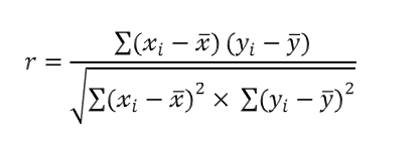

In [12]:
#######################################################################
### 방법2: 판다스를 이용한 상관도 계산
### 판다스는 표본집단 계산입니다.  n계산이 아니라 n-1 계산임
#######################################################################

# tf_
tf_.corr()

,R,머신러닝,분석,시각화,차트,파이썬
R,1.000000,-1.000000,0.500000,0.500000,0.000000,-0.866025
머신러닝,-1.000000,1.000000,-0.500000,-0.500000,0.000000,0.866025
분석,0.500000,-0.500000,1.000000,1.000000,-0.866025,-0.866025
시각화,0.500000,-0.500000,1.000000,1.000000,-0.866025,-0.866025
차트,0.000000,0.000000,-0.866025,-0.866025,1.000000,0.500000
파이썬,-0.866025,0.866025,-0.866025,-0.866025,0.500000,1.000000


C:\Users\BSS\miniconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Users\BSS\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


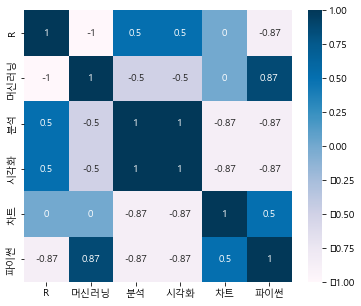

In [27]:
#################################################
#### 히트맵을 이용한 상관도 출력
#################################################

# R과 머신러닝이 -1 의 상관도임
# R이라는 글자가 나올때는 머신러닝이라는 글자가 전혀 나오지 않는다는 뜻
plt.figure(figsize=(6,5))
import seaborn as sns
sns.heatmap(tf_.corr(),annot=True,cmap = 'PuBu')

In [ ]:
word_corr[0]   # 0번째 R값의 모든 상관도 표시

In [14]:
### 단어의 집합별 상관계수 값 리스트화 하기

words=feature
edges = []

for i in range(len(words)):
    for j in range(i+1, len(words)):
        edges.append((words[i],words[j], word_corr[i,j]))

In [15]:
edges

[('R', '머신러닝', -1.0),
 ('R', '분석', 0.4999999999999999),
 ('R', '시각화', 0.4999999999999999),
 ('R', '차트', 0.0),
 ('R', '파이썬', -0.8660254037844385),
 ('머신러닝', '분석', -0.5),
 ('머신러닝', '시각화', -0.5),
 ('머신러닝', '차트', 0.0),
 ('머신러닝', '파이썬', 0.8660254037844387),
 ('분석', '시각화', 0.9999999999999998),
 ('분석', '차트', -0.8660254037844385),
 ('분석', '파이썬', -0.8660254037844385),
 ('시각화', '차트', -0.8660254037844385),
 ('시각화', '파이썬', -0.8660254037844385),
 ('차트', '파이썬', 0.5)]

In [16]:
# 상관도 내림차순순으로 sort(reverse=True)
# 상관도 오름차순순으로 sort(reverse=False)
edges = sorted(edges, key=lambda x:x[2],reverse=True)
edges[:5] #상관도 높은 상위 5개 자료보기

[('분석', '시각화', 0.9999999999999998),
 ('머신러닝', '파이썬', 0.8660254037844387),
 ('차트', '파이썬', 0.5),
 ('R', '분석', 0.4999999999999999),
 ('R', '시각화', 0.4999999999999999)]

In [17]:
# 네트워크 그래프를 이용한 단어간 상관도 시각화

##############################
### 상관계수 시각화에 사용할 가중치를
### 상관도로 숫자로 작업하고자 함
######################################

#weight_list=[]
#for x in edges:
    #weight_list.append(x[2])
#weight_list


weight_list=[x[2] for x in edges]   # weight_list = [weight for _, _, weight in edges] 도 사용가능
weight_list

[0.9999999999999998,
 0.8660254037844387,
 0.5,
 0.4999999999999999,
 0.4999999999999999,
 0.0,
 0.0,
 -0.5,
 -0.5,
 -0.8660254037844385,
 -0.8660254037844385,
 -0.8660254037844385,
 -0.8660254037844385,
 -0.8660254037844385,
 -1.0]

In [18]:
##############################
### 상관계수 시각화에 사용할 연결된 노드 이름 쌍
######################################
edge_list = [(word1,word2) for word1, word2, weight in edges]
edge_list

[('분석', '시각화'),
 ('머신러닝', '파이썬'),
 ('차트', '파이썬'),
 ('R', '분석'),
 ('R', '시각화'),
 ('R', '차트'),
 ('머신러닝', '차트'),
 ('머신러닝', '분석'),
 ('머신러닝', '시각화'),
 ('R', '파이썬'),
 ('분석', '차트'),
 ('분석', '파이썬'),
 ('시각화', '차트'),
 ('시각화', '파이썬'),
 ('R', '머신러닝')]

In [19]:
!pip install networkx

In [20]:
import networkx as nx

G = nx.Graph()
rank=10

edge_set = set()  
for word1, word2, weight in edges[:rank]:   # 상관도가 높은 값에서 101개까지. 여기서는 15개만 있음으로 모두 나옴.
    G.add_edge(word1, word2, weight=weight) # 단어1,2 자료와 거기에 해당되는 상관도값(weight)
    edge_set.add((word1,word2))
edge_set

{('R', '분석'),
 ('R', '시각화'),
 ('R', '차트'),
 ('R', '파이썬'),
 ('머신러닝', '분석'),
 ('머신러닝', '시각화'),
 ('머신러닝', '차트'),
 ('머신러닝', '파이썬'),
 ('분석', '시각화'),
 ('차트', '파이썬')}

In [21]:
# https://networkx.org/documentation/stable/tutorial.html
# https://95pbj.tistory.com/34   (한국어 사이트)


print('\n ▶ 노드갯수 출력')   # feature 갯수 (R, 분석, 시각화, 머신러닝, 파이썬, 차트)
print(G.number_of_nodes())

print('\n ▶노드값 출력')
print(G.nodes)

print('\n ▶ 엣지(word1,word2)값 출력')
print(G.edges)


## 디그리는 노드에서 분기하는 선의 갯수로서
# 여기서는 모든 노드와 연결되어 있음.(상관도를 모두 구함으로)
# 그래서 분석일때는 5개의 노드(n-1)개의 디그리가 생김.  분석->시각화, 분석->머신러닝, 분석->파이썬, 분석->차트, 분석-R
print('\n ▶ 디그리값 출력')  
print(G.degree)


print('\n ▶ 인접')
print(G.adj)
      
print('\n ▶ edges의 갯수')
print(G.number_of_edges())


print('\n ▶ 요약 ')
print(nx.info(G))


 ▶ 노드갯수 출력
6

 ▶노드값 출력
['분석', '시각화', '머신러닝', '파이썬', '차트', 'R']

 ▶ 엣지(word1,word2)값 출력
[('분석', '시각화'), ('분석', 'R'), ('분석', '머신러닝'), ('시각화', 'R'), ('시각화', '머신러닝'), ('머신러닝', '파이썬'), ('머신러닝', '차트'), ('파이썬', '차트'), ('파이썬', 'R'), ('차트', 'R')]

 ▶ 디그리값 출력
[('분석', 3), ('시각화', 3), ('머신러닝', 4), ('파이썬', 3), ('차트', 3), ('R', 4)]

 ▶ 인접
{'분석': {'시각화': {'weight': 0.9999999999999998}, 'R': {'weight': 0.4999999999999999}, '머신러닝': {'weight': -0.5}}, '시각화': {'분석': {'weight': 0.9999999999999998}, 'R': {'weight': 0.4999999999999999}, '머신러닝': {'weight': -0.5}}, '머신러닝': {'파이썬': {'weight': 0.8660254037844387}, '차트': {'weight': 0.0}, '분석': {'weight': -0.5}, '시각화': {'weight': -0.5}}, '파이썬': {'머신러닝': {'weight': 0.8660254037844387}, '차트': {'weight': 0.5}, 'R': {'weight': -0.8660254037844385}}, '차트': {'파이썬': {'weight': 0.5}, 'R': {'weight': 0.0}, '머신러닝': {'weight': 0.0}}, 'R': {'분석': {'weight': 0.4999999999999999}, '시각화': {'weight': 0.4999999999999999}, '차트': {'weight': 0.0}, '파이썬': {'weight': -0.86602540378443

C:\Users\BSS\AppData\Local\Temp\ipykernel_16656\3912046564.py:30: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [22]:
tmp=np.sum(tf_.values,axis=0)
print(tmp)
nsize=tmp
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))
print(nsize)


[2 1 1 1 3 3]
[1000.    0.    0.    0. 2000. 2000.]


In [23]:
tf_

,R,머신러닝,분석,시각화,차트,파이썬
0,0,1,0,0,1,2
1,1,0,0,0,2,1
2,1,0,1,1,0,0


[('분석', '시각화', 0.9999999999999998), ('머신러닝', '파이썬', 0.8660254037844387), ('차트', '파이썬', 0.5), ('R', '분석', 0.4999999999999999), ('R', '시각화', 0.4999999999999999), ('R', '차트', 0.0), ('머신러닝', '차트', 0.0), ('머신러닝', '분석', -0.5), ('머신러닝', '시각화', -0.5), ('R', '파이썬', -0.8660254037844385)]


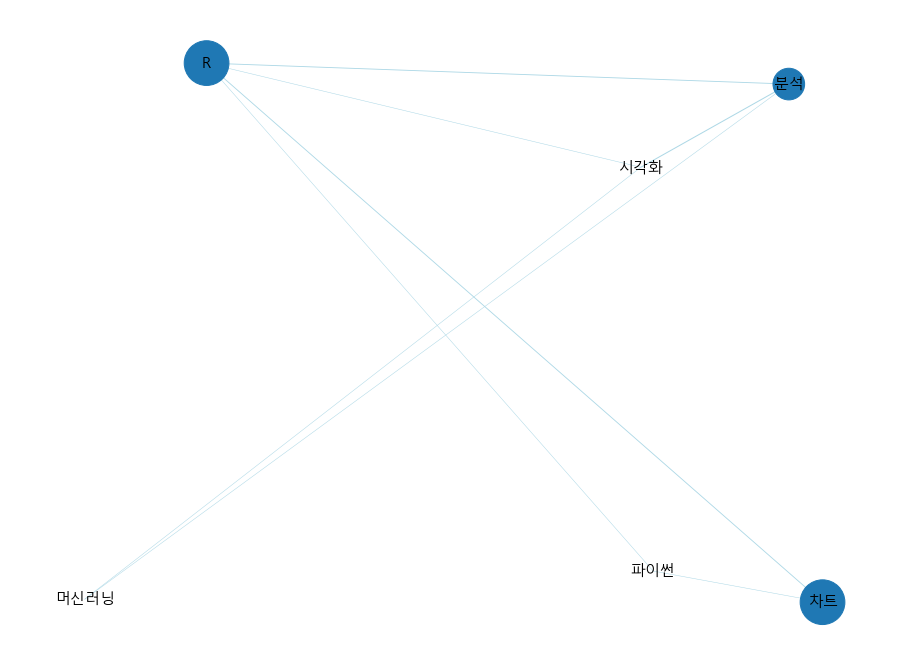

In [28]:
###############################
### 상관계수 시각화
## 그래프를  그리기 위해서 준비해야 하는건
## 몇개의 노드를 준비할지,
# 그 노드에서 몇개의 디그리가 나올지
# 그리고 엣지(노드와 노드의 쌍)별 거리는 무엇으로 할지.
##############################

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.figure(figsize=(16,12)); plt.axis('off')

fname = fm.FontProperties().get_name()


print(edges[:rank])
nx.draw_networkx(G, with_labels = True,
                 font_family=fname,width=weight_list[:rank],edge_color='lightblue',font_size=15,
                 node_size=nsize)   # 상관관계값이 높을수록 가깝게 표시됨

# nx.draw_networkx(G,node_size=nsize,
#                  alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
#                  font_family=fname,font_size=15)

In [25]:
## 장바구니 분석
## 


##############################
##  2차원리스트 셋으로 변환뒤, df 제작
################################
docs=['파이썬 차트 파이썬 머신러닝',
      '차트 파이썬 R 차트',
       'R 분석 시각화'
      ]
dataset=[i.split(' ') for i in docs]

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te.fit(dataset)
print(te.columns_)

te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

ModuleNotFoundError: No module named 'mlxtend'

In [112]:
### 지지도 하한선 정하기
## item 조합 갯수가 특정갯수 이상의 item만 추출


frequent_itemsets=apriori(df,min_support=0.1,use_colnames=True)
print(frequent_itemsets[:3])


frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) 
frequent_itemsets[frequent_itemsets['length'] >=2] 

    support itemsets
0  0.666667      (R)
1  0.333333   (머신러닝)
2  0.333333     (분석)


,support,itemsets,length
6,0.333333,"(R, 분석)",2
7,0.333333,"(R, 시각화)",2
8,0.333333,"(R, 차트)",2
9,0.333333,"(R, 파이썬)",2
10,0.333333,"(머신러닝, 차트)",2
11,0.333333,"(머신러닝, 파이썬)",2
12,0.333333,"(시각화, 분석)",2
13,0.666667,"(파이썬, 차트)",2
14,0.333333,"(R, 시각화, 분석)",3
15,0.333333,"(R, 파이썬, 차트)",3


In [ ]:
from mlxtend.frequent_patterns import apriori,association_rules
rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(R),(분석),0.666667,0.333333,0.333333,0.5,1.50,0.111111,1.333333
1,(분석),(R),0.333333,0.666667,0.333333,1.0,1.50,0.111111,inf
2,(시각화),(R),0.333333,0.666667,0.333333,1.0,1.50,0.111111,inf
3,(R),(시각화),0.666667,0.333333,0.333333,0.5,1.50,0.111111,1.333333
4,(R),(차트),0.666667,0.666667,0.333333,0.5,0.75,-0.111111,0.666667
5,(차트),(R),0.666667,0.666667,0.333333,0.5,0.75,-0.111111,0.666667
6,(R),(파이썬),0.666667,0.666667,0.333333,0.5,0.75,-0.111111,0.666667
7,(파이썬),(R),0.666667,0.666667,0.333333,0.5,0.75,-0.111111,0.666667
8,(머신러닝),(차트),0.333333,0.666667,0.333333,1.0,1.50,0.111111,inf
9,(차트),(머신러닝),0.666667,0.333333,0.333333,0.5,1.50,0.111111,1.333333


In [ ]:
############################
### 실전
##################################

In [116]:
import pandas as pd
df = pd.read_excel('./data/News_2018.xlsx')
df.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,1.300201e+06,20181130,강원일보,허남윤,`2030 여성 인기' 출시 6개월만에 50만병 판매,사회>여성,NaN,NaN,NaN,NaN,NaN,NaN,"서울,횡성","코엑스,국순당,유산균 막걸리","인기,여성,출시,50만,판매,국순당,유산균,막걸리,전통주,기업,횡성,국순당,여성,디...","유산균,국순당,서울디저트쇼,여성층,마리,전시회,서울,코엑스,1병,전통주,50만,횡성...",전통주 기업인 횡성 국순당이 2030 여성들을 잡기 위해 `디저트 마케팅'을 펼쳐 ...,http://www.kwnews.co.kr/nView.asp?s=401&aid=21...,NaN
1,2.100851e+06,20181130,아주경제,이서우,"​[신세계그룹 인사]정용진, 식품계열사 힘줬다 “신사업 기반 구축”",경제>서비스_쇼핑,경제>유통,NaN,NaN,NaN,NaN,"우창균,김운아,성기열","신사,이천점","이마트,제주소주,신세계L&B,롯데칠성음료,두산그룹,동양맥주,두산,신세계그룹,신세계푸...","신세계그룹,인사,정용진,식품계열사,신사업,구축,왼쪽,우창균,제주소주,제주,소주,신세...","신세계푸드,신세계,제주소주,신사업,우창균,매입유통,신세계그룹,성기열,대표이사,이마트...","(왼쪽부터)우창균 제주소주 겸 신세계L&B 대표, 김운아 신세계푸드 제조서비스 부문...",http://www.ajunews.com/view/20181130174417595,예외
2,2.100201e+06,20181130,머니투데이,김은령|기자,"신세계푸드, 급 외식-HMR 부문대표제 개편 전문성 강화",경제>유통,경제>자동차,IT_과학>모바일,NaN,NaN,NaN,"성열기,김운아",NaN,"MD전략본부,올반LAB,신세계엘앤비,신세계","신세계푸드,외식,HMR,대표,개편,전문성,강화,대표,김운아,제조,서비스,성열기,내정...","신세계푸드,매입유통부문,hmr,신세계,대표이사,김운아,성열기,제조서비스부문,이마트,...",[머니투데이 김은령 기자] [김운아 제조서비스부문 대표 성열기 매입유통부문 대표 내...,http://news.moneytoday.co.kr/view/mtview.php?n...,NaN
3,2.100801e+06,20181130,아시아경제,최신혜,"'연말 특수' 호텔 객실료 천정부지 ""20만원 객실이 40만원으로""(종합)",경제>유통,경제>부동산,경제>서비스_쇼핑,NaN,NaN,NaN,NaN,"파르나스,시그니엘,서울,부티크","델리,서울신라호텔,서울,패스트리부티크,롯데호텔서울,인터컨티넨탈,피에르,가니에르,워커...","연말,특수,천정부지,호텔,객실료,20만,객실,40만,종합,크리스마스,연말,성수기,업...","객실료,다음달,20만,원짜리,그랜드,서울,레스케이프,서울신라호텔,롯데호텔서울,만큼,...",크리스마스 연말 '업계 최대 성수기'레스케이프 신라호텔 등 객실료 두 배로 껑충 [...,http:www.asiae.co.kr/news/view.htm?idxno=20181...,NaN
4,1.500601e+06,20181130,매일신문,노경화,대구 주말 가볼만한 곳...여기어때? '대구 커피 박람회' 11월 29일~12월 2...,지역>대구,문화>전시_공연,지역>경남,NaN,NaN,NaN,NaN,"아라비카커피로스터스,대구,대구커피브랜드,대구커피＆,대구커피포럼","사무,대구커피＆카페박람회,디카프리커피로스터스,세미나,대구지역,엑스코,카페특별기획관","대구,주말,박람회,대구,커피,12월,엑스코,대구,대구,주말,박람회,대구,커피,12월...","대구,박람회,홍보관,일요일,스페셜티커피,커피나무,대구커피,전문가,목요일,스페셜티커피...",대구 주말 가볼만한 곳...여기어때? '대구 커피 박람회' 11월 29일~12월 2...,https://news.imaeil.com/Life/2018113012231616053,NaN


In [117]:
data=df['특성추출(가중치순 상위 50개)']



# docs=[]
# for doc in docs[:5]:
#   tmp=doc.split(',')
#   line.append(tmp)

docs=[doc.split(',') for doc in data[:5]]
docs
uniqueList=sorted(list(set(np.concatenate(np.array(docs)))))
uniqueList


### -- DTM 계산
######################################
### 컬럼자료의 출현횟수를 계산함.
### [방법1] 직접작성
###################################
import pandas as pd
result=[]

for col in uniqueList:   # 리스트의처음값 'R'로 보기
    list_=[]
    for row in docs:      #1번행에서 확인
        cnt=0
        
        for item in row:
            if col==item:
                cnt=cnt+1
        # print('------------------------------')
        #print('검색단어: %s   검색된횟수: %d' %(col,cnt))
        
        list_.append(cnt)
    result.append(list_)

tf_ = pd.DataFrame(result)
print(tf_)

print('--------------------------')
tf_=tf_.T
print(tf_)


tf_.columns = uniqueList
display(tf_)

print(np.sum(tf_.values, axis=1))
print(np.sum(tf_.values, axis=0))

     0  1  2  3  4
0    0  0  0  1  0
1    1  0  0  0  0
2    0  0  0  1  0
3    0  0  0  0  1
4    0  0  0  1  0
..  .. .. .. .. ..
106  1  0  0  0  0
107  1  0  0  0  0
108  0  0  0  1  0
109  0  0  0  0  1
110  1  0  0  0  0

[111 rows x 5 columns]
--------------------------
   0    1    2    3    4    5    6    7    8    9    ...  101  102  103  104  \
0    0    1    0    0    0    1    0    0    0    0  ...    1    0    0    1   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    1    1  ...    0    0    0    0   
3    1    0    1    0    1    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    1    0    0    1    1    0    0  ...    0    1    1    0   

   105  106  107  108  109  110  
0    1    1    1    0    0    1  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    1    0    0  
4    0    0    0    0    1    0  

[5 rows x 111 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':


,18만,1병,20만,250여개,40만,50만,5천,brewing,hmr,가정간,...,출시,카페노무,커피나무,코엑스,타깃,판매,평가,홈페이지,홍보관,횡성
0,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,1,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,1,1,0,0,0,0,0,1,0


[32 19 23 19 26]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


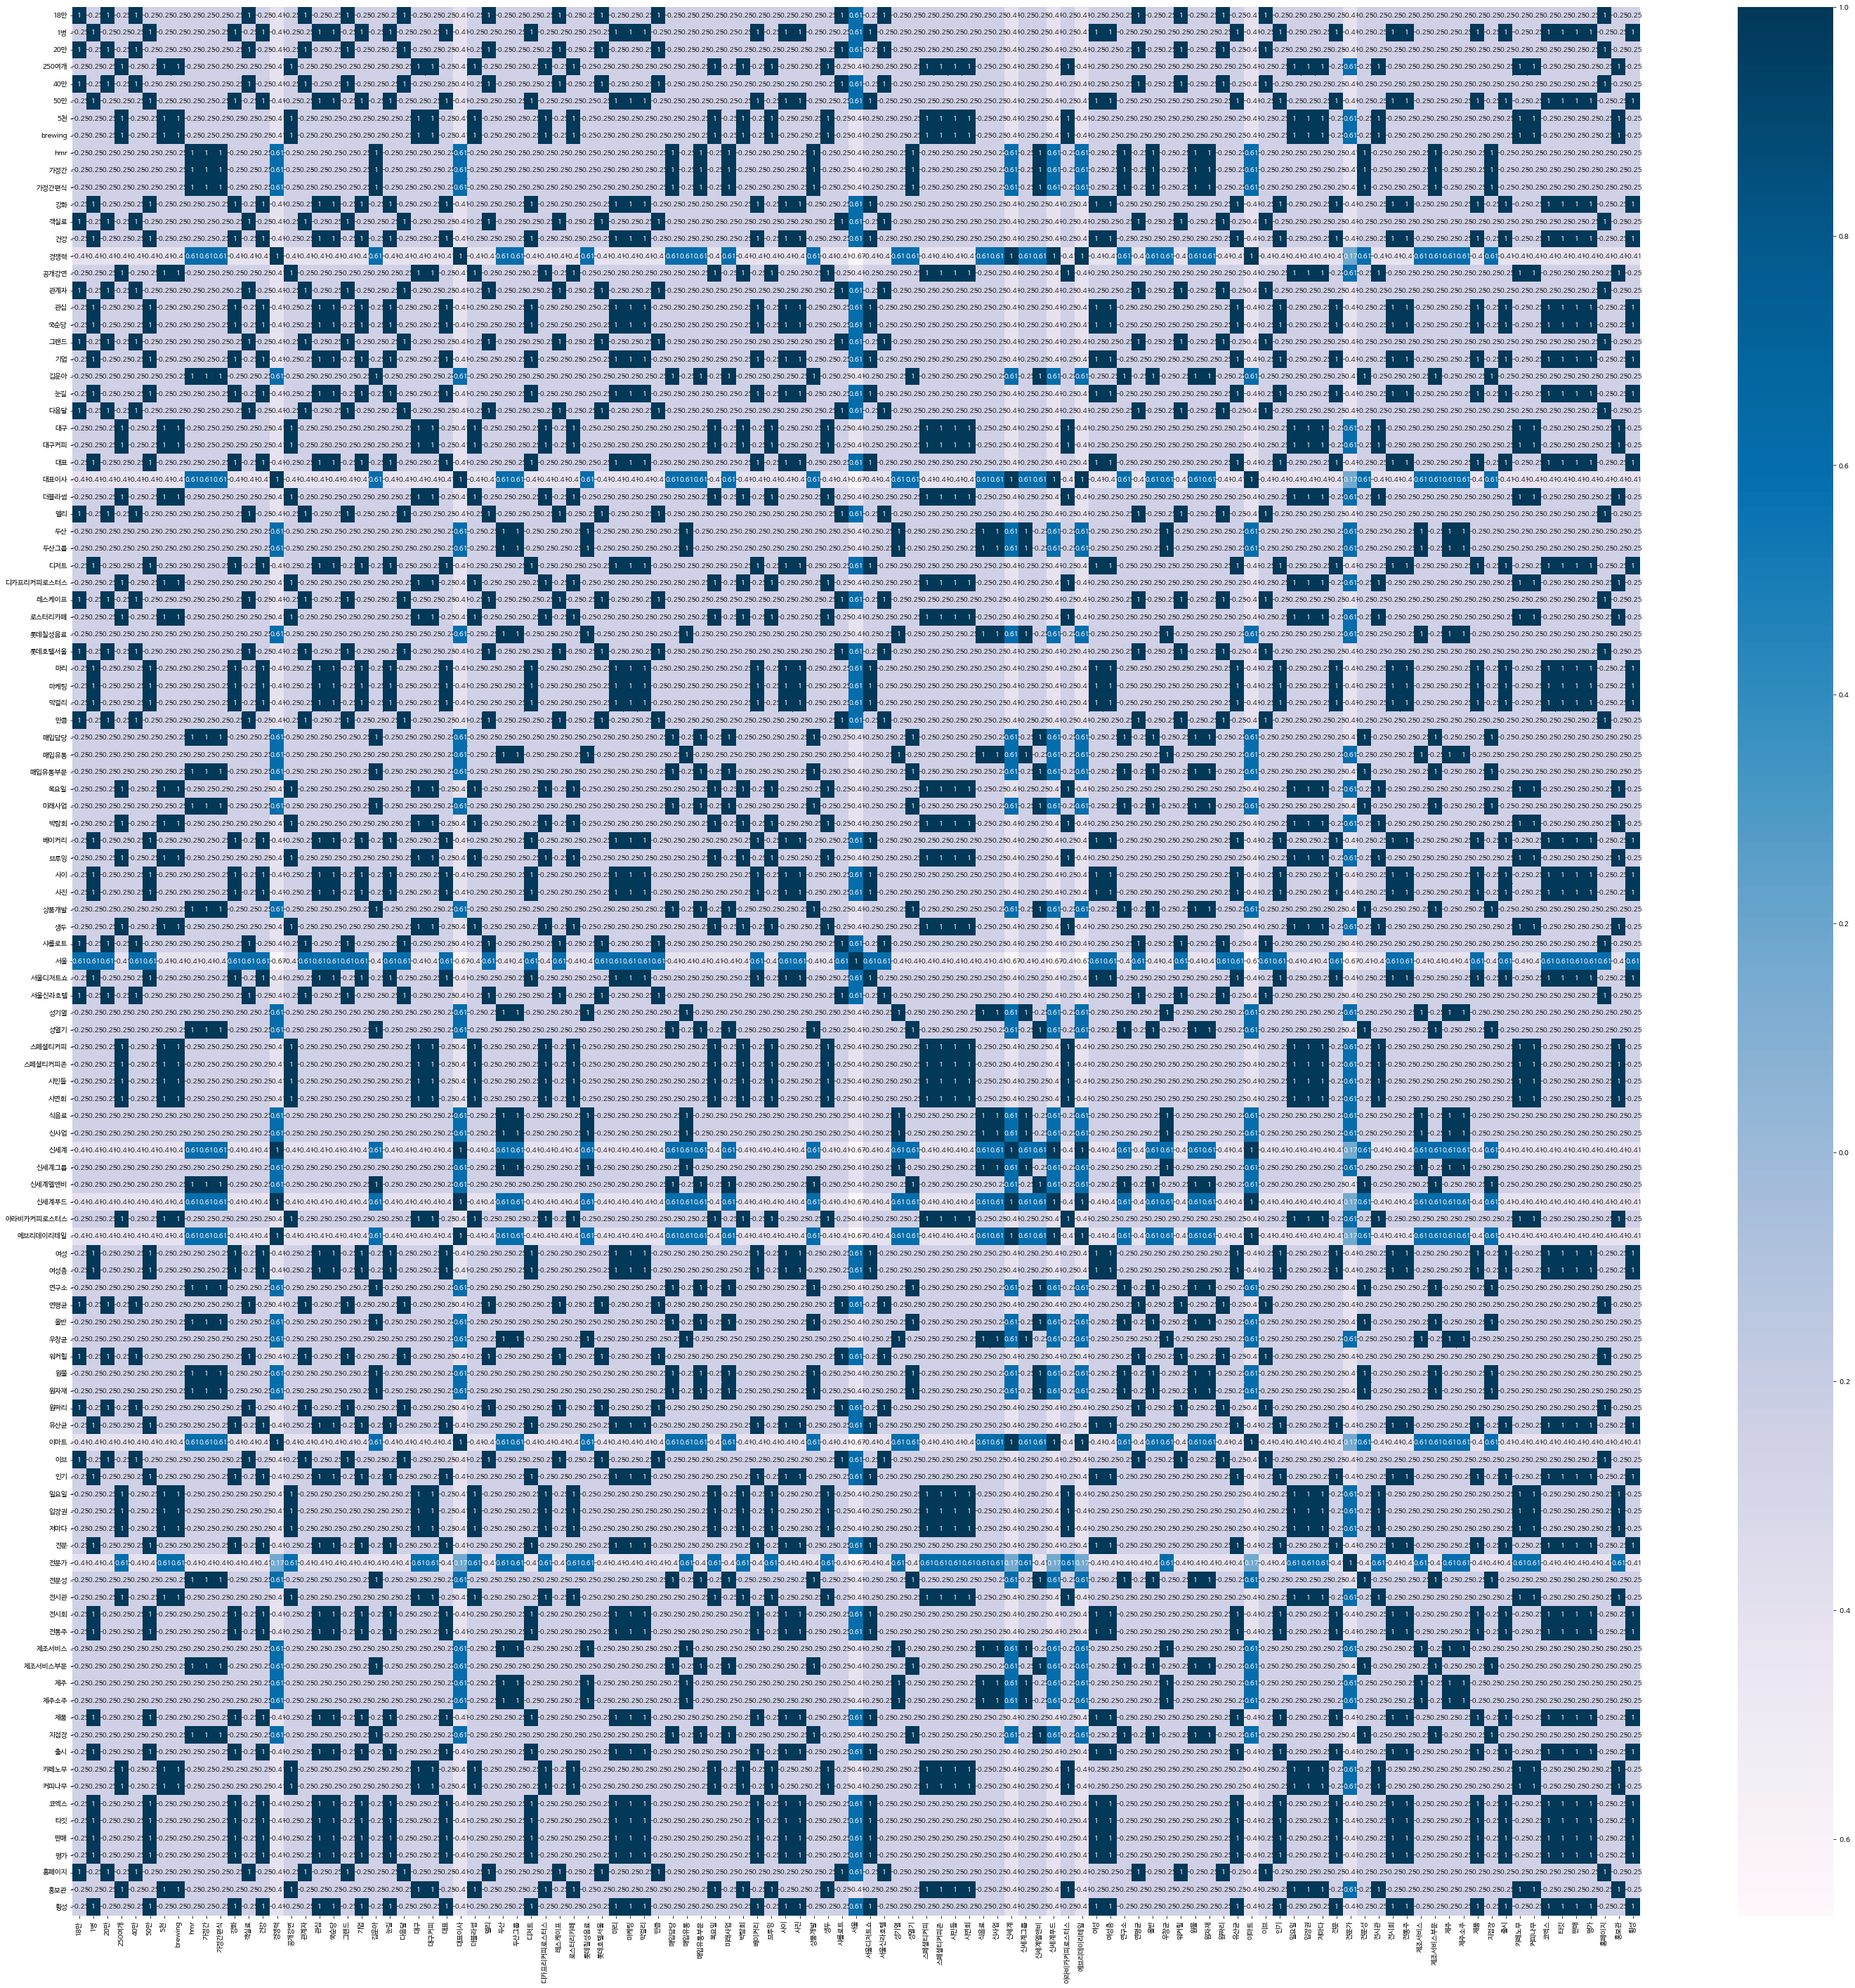

In [118]:
#################################################
#### 히트맵을 이용한 상관도 출력
#################################################
plt.figure(figsize=(50,50))
import seaborn as sns
sns.heatmap(tf_.corr(),annot=True,cmap = 'PuBu')

In [ ]:
## 연관분석, 상관도분석에서 외부 데이터의 종류와 데이터셋의 상황에 따라
## 불러온 자료를 작업형식에 맞추는 작업은 고정되어 있지 않음.

## 미션
## 상관계수를 함수로 작성하여 사용
## 작성된 함수를 모듈로 작성하여서 import 하여 사용
## 상관계수연관분석, 네트워크 그래프등 필요한 작업을  모듈로 작성하여 import 하여 사용
## 작업시 class 모듈도 작성해봄

## 빅카인즈 2018.csv ~2021.csv 자료를 비교하고 인사이트를 찾아봄

## 정답은 별도로 제공함